In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# 1. Load data
df = pd.read_csv('Mall_Customers.csv')
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# 2. Normalisasi (opsional, direkomendasikan)
X = (X - X.mean(axis=0)) / X.std(axis=0)

In [5]:
# 3. Fungsi inisialisasi centroid dengan KMeans++
def initialize_centroids_kmeanspp(X, k):
    n_samples, _ = X.shape
    centroids = []
    
    # Pilih centroid pertama secara acak
    first_idx = np.random.choice(n_samples)
    centroids.append(X[first_idx])
    
    # Pilih centroid berikutnya
    for _ in range(1, k):
        # Hitung jarak kuadrat ke centroid terdekat yang sudah dipilih
        distances = np.array([min(np.sum((x - c)**2) for c in centroids) for x in X])
        probabilities = distances / distances.sum()
        next_idx = np.random.choice(n_samples, p=probabilities)
        centroids.append(X[next_idx])
    
    return np.array(centroids)

In [6]:
# 4. Fungsi Euclidean distance
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2, axis=1))

In [7]:
# 5. KMeans manual
def kmeans_manual(X, k, max_iters=100):
    centroids = initialize_centroids_kmeanspp(X, k)
    
    for _ in range(max_iters):
        # Assign ke centroid terdekat
        clusters = np.array([np.argmin(euclidean_distance(x, centroids)) for x in X])

        # Update centroid
        new_centroids = np.array([X[clusters == i].mean(axis=0) if len(X[clusters == i]) > 0 else centroids[i] for i in range(k)])

        # Cek konvergensi
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    
    return centroids, clusters

In [8]:
# 6. Jalankan KMeans++
k = 5
centroids, clusters = kmeans_manual(X, k)

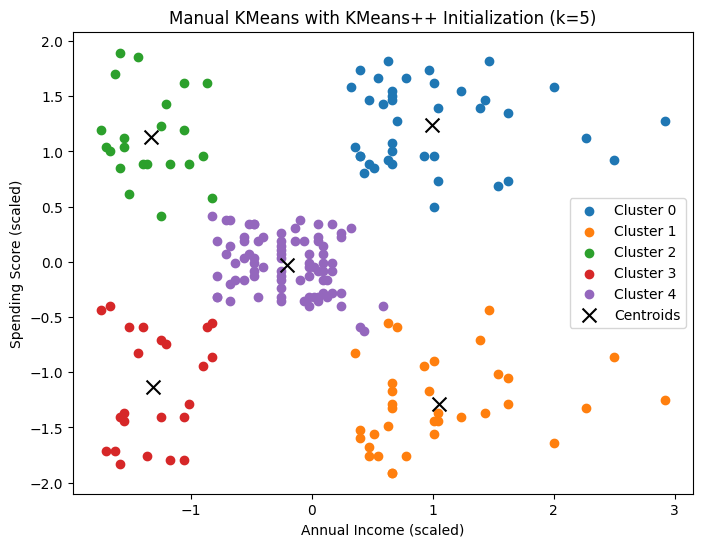

In [9]:
# 7. Visualisasi hasil clustering
plt.figure(figsize=(8, 6))
for i in range(k):
    plt.scatter(X[clusters == i, 0], X[clusters == i, 1], label=f'Cluster {i}')
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', s=100, label='Centroids')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title(f'Manual KMeans with KMeans++ Initialization (k={k})')
plt.legend()
plt.show()